### Given the data of a feature contributing to different classes
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Check whether the distribution of all the classes are the same or not.

b. Check for the equality of variance/

c. Which amount LDA and QDA would perform better on this data for classification and why.

d. Check the equality of mean for between all the classes

In [1]:
#1 To check whether distrbution of classes are same or not


import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df 

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


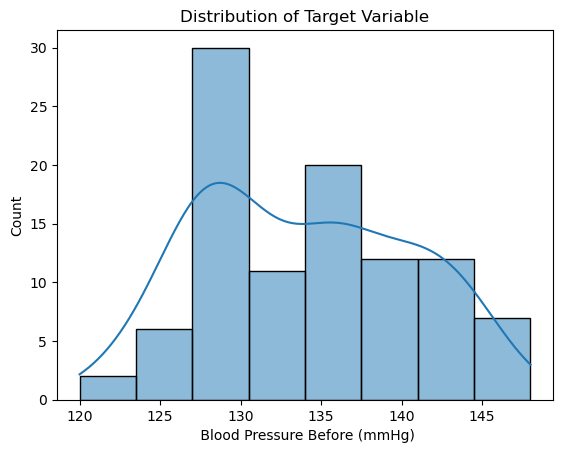

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df[' Blood Pressure Before (mmHg)'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

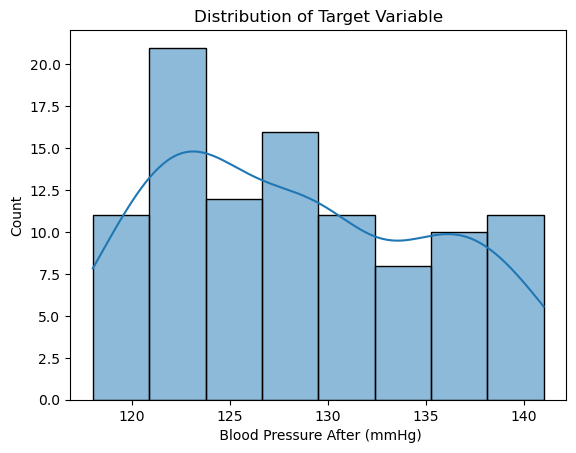

In [6]:
sns.histplot(df[' Blood Pressure After (mmHg)'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

In [10]:
df["Pressure after"] = df[" Blood Pressure After (mmHg)"]
df["Pressure before"] = df[" Blood Pressure Before (mmHg)"]

df.drop([" Blood Pressure Before (mmHg)", " Blood Pressure After (mmHg)"], axis=1, inplace=True) 
df

,Patient ID,Pressure after,Pressure before
0,1,120,130
1,2,135,142
2,3,118,120
3,4,127,135
4,5,140,148
...,...,...,...
95,96,129,136
96,97,137,143
97,98,123,127
98,99,135,139


In [11]:
from scipy.stats import ttest_rel, wilcoxon
t_statistic, p_value = ttest_rel(df["Pressure before"], df["Pressure after"])

# Perform a Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_p_value = wilcoxon(df["Pressure before"], df["Pressure after"])

# Print the results
print("Paired t-test:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

print("\nWilcoxon signed-rank test:")
print(f"Test statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_p_value}")

Paired t-test:
t-statistic: 38.40500458621546
p-value: 2.817165090364283e-61

Wilcoxon signed-rank test:
Test statistic: 0.0
p-value: 2.58374555099369e-18


In [12]:
#The value is above 0.5, so that we can we failed to reject null hypothesis, they are distributed

In [13]:
#b. Check for the equality of variance

In [14]:
from scipy.stats import levene, bartlett

In [15]:
levene_stat, levene_p_value = levene(df["Pressure before"], df["Pressure after"])

# Perform Bartlett's test for equality of variances
bartlett_stat, bartlett_p_value = bartlett(df["Pressure before"], df["Pressure after"])

# Print the results
print("Levene's test:")
print(f"Test statistic: {levene_stat}")
print(f"p-value: {levene_p_value}")

print("\nBartlett's test:")
print(f"Test statistic: {bartlett_stat}")
print(f"p-value: {bartlett_p_value}")


Levene's test:
Test statistic: 0.18038002140150966
p-value: 0.6715080090945376

Bartlett's test:
Test statistic: 0.18186572743882348
p-value: 0.6697747425427487


In [16]:
#p-value > 0.05, so there is no significance in variance

In [17]:
#c.  Which amount LDA and QDA would perform better on this data for classification and why.

In [18]:
#LDA LDA performs well when the assumptions of similar covariance structure and normality 